# Computer Vision (Image operators and filters)

By the end of this lab, you will get hands on experience working with:

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

<!-- ### **Remember this is a graded exercise.** -->

**Reminder**:

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [38]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology 

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

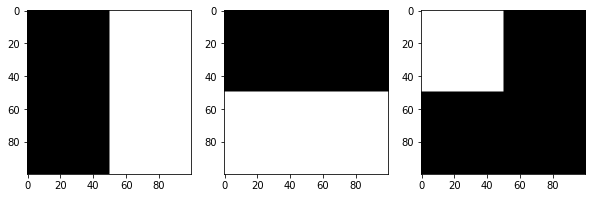

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


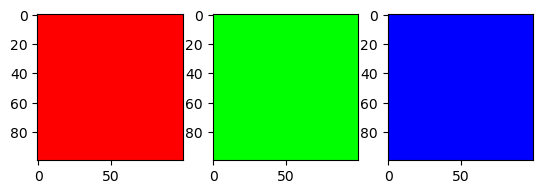

In [39]:
# Solution for: Channels and color spaces
import numpy as np
import matplotlib.pyplot as plt
img1 = np.zeros((100, 100, 3), dtype=np.uint8)
img1[:, :, 0] = 255  # Red channel
img2 = np.zeros((100, 100, 3), dtype=np.uint8)
img2[:, :, 1] = 255  # Green channel
img3 = np.zeros((100, 100, 3), dtype=np.uint8)
img3[:, :, 2] = 255  # Blue channel
fig, axes = plt.subplots(1, 3)
axes[0].imshow(img1)
axes[1].imshow(img2)
axes[2].imshow(img3)
plt.show()

*   Use the above three images to create the following image

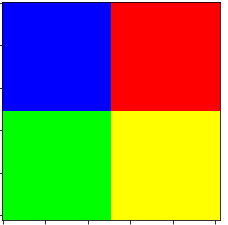
*Hint: Remember channels and color spaces*

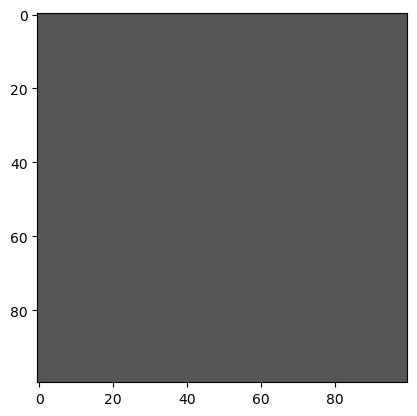

In [40]:
# Solution for: Channels and color spaces (combining images)
img_combined = img1 // 3 + img2 // 3 + img3 // 3
plt.imshow(img_combined)
plt.show()

### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

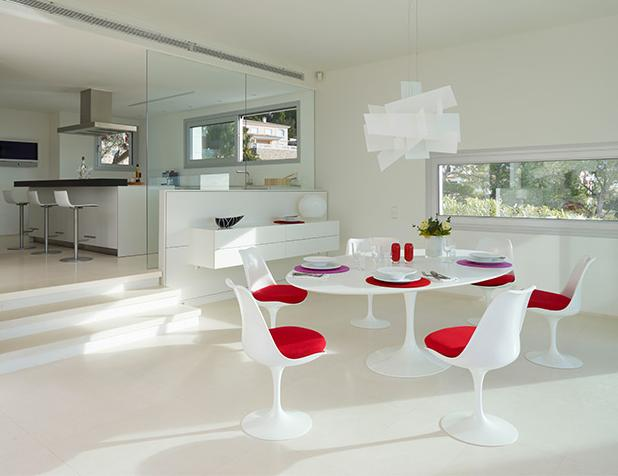

*   Extract individual channels and plot them using matplotlib subplot.



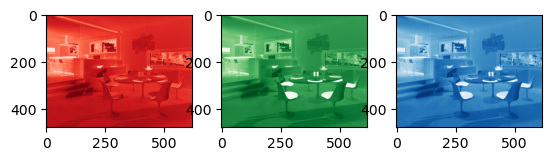

In [41]:
# Solution for: Color Manipulation
from skimage import io
img = io.imread('sillas.jpg')
red_channel = img[:, :, 0]
green_channel = img[:, :, 1]
blue_channel = img[:, :, 2]
fig, axes = plt.subplots(1, 3)
axes[0].imshow(red_channel, cmap='Reds')
axes[1].imshow(green_channel, cmap='Greens')
axes[2].imshow(blue_channel, cmap='Blues')
plt.show()

*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

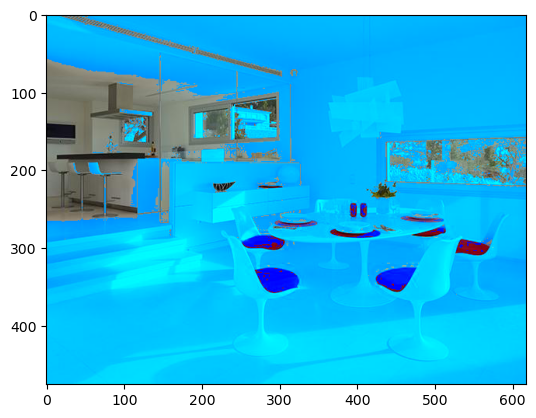

In [42]:
# Solution for: Changing Red to Blue
img_modified = img.copy()
red_pixels = img[:, :, 0] > 150  # Identifying red pixels
img_modified[red_pixels, 0] = 0  # Remove red
img_modified[red_pixels, 2] = 255  # Add blue
plt.imshow(img_modified)
plt.show()

# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

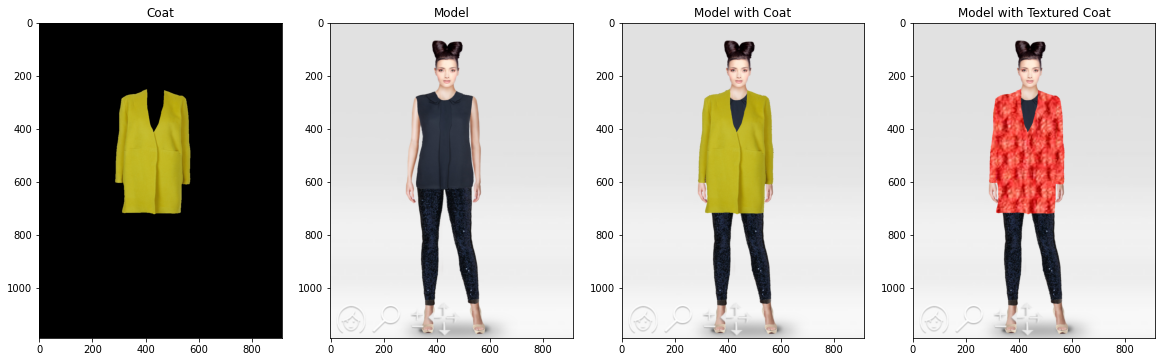

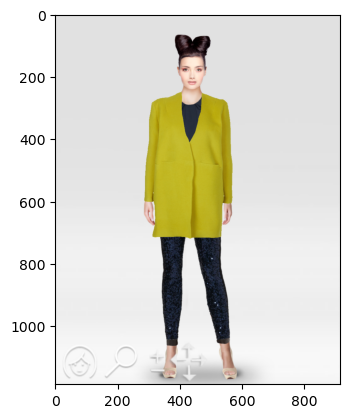

In [43]:
# Solution for: Image Operators
model = io.imread('model.png')
coat = io.imread('coat.png')
mask = coat[:, :, 0] > 100  # Extract mask for coat
model[mask] = coat[mask]  # Apply coat
plt.imshow(model)
plt.show()

# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




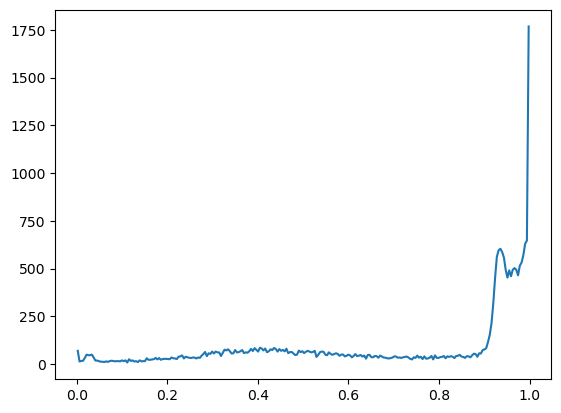

In [44]:
# Solution for: Histogram Computation
from skimage import color, exposure
gray_img = color.rgb2gray(io.imread('astronaut.png'))
hist = exposure.histogram(gray_img)
plt.plot(hist[1], hist[0])
plt.show()

*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

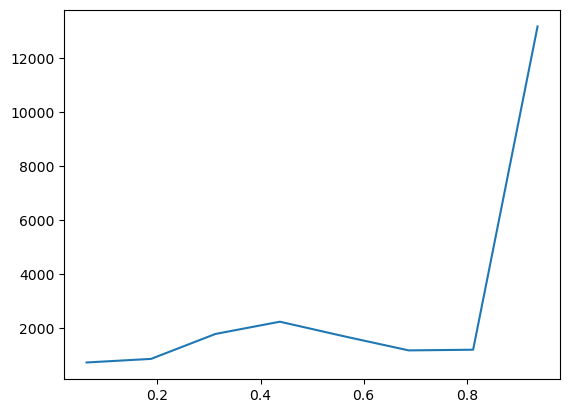

In [46]:
# Solution for: Histogram with 8 bins
hist_8bins = exposure.histogram(gray_img, nbins=8)
plt.plot(hist_8bins[1], hist_8bins[0])
plt.show()



*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

*(Double-click or enter to edit)*

...


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


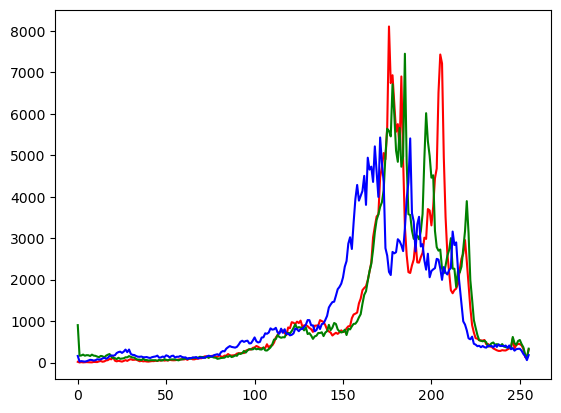

In [47]:
# Solution for: Color Histogram
hist_r = exposure.histogram(img[:, :, 0])
hist_g = exposure.histogram(img[:, :, 1])
hist_b = exposure.histogram(img[:, :, 2])
plt.plot(hist_r[1], hist_r[0], 'r')
plt.plot(hist_g[1], hist_g[0], 'g')
plt.plot(hist_b[1], hist_b[0], 'b')
plt.show()

### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



C:\Users\s4460\anaconda3\envs\ironhack\Lib\site-packages\skimage\_shared\utils.py:445: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


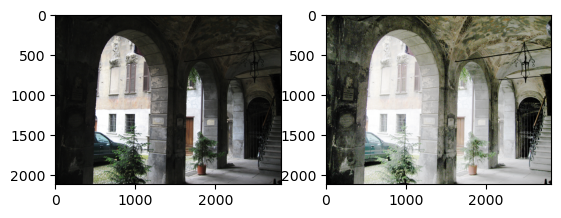

In [48]:
# Solution for: Histogram Equalization
low_contrast = io.imread('aquatermi_lowcontrast.jpg')
equalized = exposure.equalize_hist(low_contrast)
plt.subplot(1, 2, 1)
plt.imshow(low_contrast, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(equalized, cmap='gray')
plt.show()


*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

*(Double-click or enter to edit)*

...

### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function). 
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



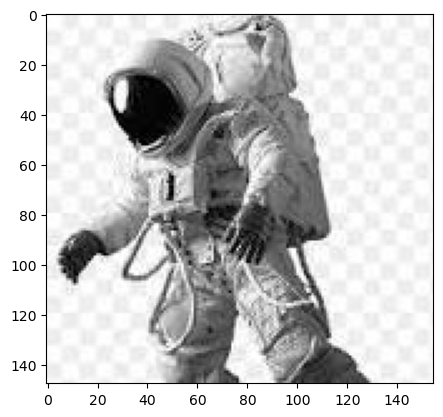

In [49]:
# Solution for: Linear Contrast Stretch
def linear_contrast_stretch(img, bins=256):
    min_val, max_val = img.min(), img.max()
    stretched = (img - min_val) / (max_val - min_val) * 255
    return stretched.astype(np.uint8)
enhanced = linear_contrast_stretch(gray_img)
plt.imshow(enhanced, cmap='gray')
plt.show()

# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




C:\Users\s4460\anaconda3\envs\ironhack\Lib\site-packages\IPython\core\interactiveshell.py:3577: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


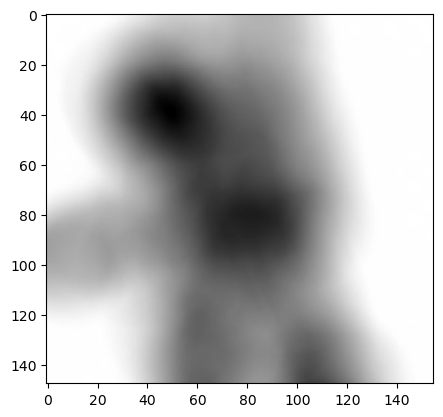

In [50]:
# Solution for: Mean Filter
from skimage.morphology import disk
from skimage.filters.rank import mean
selem = disk(20)
filtered = mean(gray_img, selem)
plt.imshow(filtered, cmap='gray')
plt.show()

*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

C:\Users\s4460\AppData\Local\Temp\ipykernel_30436\332434147.py:3: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  shapes = [square(5), rectangle(5, 10), star(5), diamond(5)]
C:\Users\s4460\AppData\Local\Temp\ipykernel_30436\332434147.py:3: FutureWarning: `rectangle` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  shapes = [square(5), rectangle(5, 10), star(5), diamond(5)]


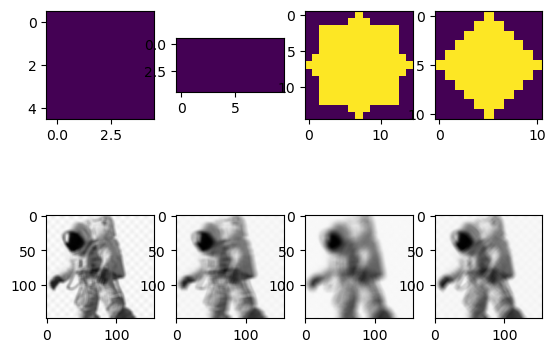

In [51]:
# Solution for: Mean Filter with Different Shapes
from skimage.morphology import square, rectangle, star, diamond
shapes = [square(5), rectangle(5, 10), star(5), diamond(5)]
fig, axes = plt.subplots(2, len(shapes))
for i, selem in enumerate(shapes):
    filtered = mean(gray_img, selem)
    axes[0, i].imshow(selem)
    axes[1, i].imshow(filtered, cmap='gray')
plt.show()

*   How does changing the radius of disk affect the smoothing functionality?

**Solution**

*(Double-click or enter to edit)*

...


*   What is the observed behaviour with difference in the structuring element?



**Solution**

*(Double-click or enter to edit)*

...



*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**

*(Double-click or enter to edit)*

...